This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

In [ ]:
#install packages 

!pip3 install wordcloud
!pip3 install pandas
!pip3 install folium
!pip3 install matplotlib
!pip3 install seaborn


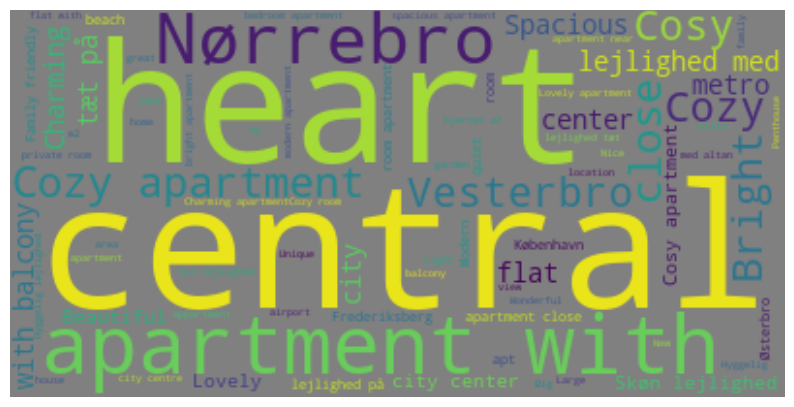

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

airbnbSheet = pd.read_csv("../data/listings.csv")

desiredColumns = [
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
]

# filteredAirbnbSheet - fas
fas = airbnbSheet[desiredColumns]  # keep only these columns
fas = fas.dropna()  # drop columns with empty vals
# drop if num of reviews is 0
fas = fas.drop(fas[fas.number_of_reviews < 1].index)


#APPARTMENT NAMES:
# Combine all the names into a single string

text = " ".join(name for name in fas['name'].astype(str))

# List of words to remove
stopwords = set(["Copenhagen", "CPH", "the", "to", "and", "of", "in", "og", "i", "at", "a"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() #uncomment to show the wordcloud


airbnbSheet
fas

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

In [ ]:
# HOST NAMES:

# Combine all the host names into a single string
text = " ".join(name for name in fas['host_name'].astype(str))

# List of words to remove (non-person names, or common words that might appear as host names)
# This list should be expanded based on the data and common non-person names you observe
# Replace with actual non-person names or words
stopwords = set(["Host1", "Host2", "ApartmentinCopenhagen"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="grey").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

In [ ]:
# the price values are in dollars
fas = fas.rename(columns={'price': 'price_in_dollars'})

# remove the dollar sign from the numbers
fas['price_in_dollars'] = fas['price_in_dollars'].str.replace(
    '$', '', regex=False).str.replace(',', '').astype(float)

bins = [0, 1_000, 2_000, 3_000, 4_000, 5_000, 6_000,
        7_000, 8_000, 9_000, 10_000, float('inf')]
labels = ['$0-1,000', '$1,000-2,000', '$2,000-3,000', '$3,000-4,000', '$4,000-5,000',
          '$5,000-6,000', '$6,000-7,000', '$7,000-8,000', '$8,000-9,000', '$9,000-10,000', '$10,000+']

fas['price_bin'] = pd.cut(fas['price_in_dollars'],
                          bins=bins, labels=labels, right=False)

print(fas[['price_in_dollars', 'price_bin']])

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

In [ ]:
import folium

color_map = {
    '$0-1,000': 'green',
    '$1,000-2,000': 'blue',
    '$2,000-3,000': 'lightblue',
    '$3,000-4,000': 'yellow',
    '$4,000-5,000': 'orange',
    '$5,000-6,000': 'darkorange',
    '$6,000-7,000': 'orangered',
    '$7,000-8,000': 'red',
    '$8,000-9,000': 'darkred',
    '$9,000-10,000': 'purple',
    '$10,000+': 'black'
}


# Create a base map centered around Copenhagen
m = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add listings to the map using the price bins for color
for idx, row in fas.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_map[row['price_bin']],
        fill=True,
        fill_color=color_map[row['price_bin']]
    ).add_to(m)

# Display the map (in Jupyter Notebook)
m

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Get a list of unique neighborhoods
neighborhoods = fas['neighbourhood_cleansed'].unique()

# Create a colormap
colors_array = cm.rainbow(np.linspace(0, 1, len(neighborhoods)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
neighborhood_color_map = dict(zip(neighborhoods, rainbow))


m2 = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add listings to the map using neighborhoods for color
for idx, row in fas.iterrows():
    neighborhood = row['neighbourhood_cleansed']
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=neighborhood_color_map[neighborhood],
        fill=True,
        fill_color=neighborhood_color_map[neighborhood],
        fill_opacity=0.7
    ).add_to(m2)

# Display the map (if you're in Jupyter Notebook)
m2

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(15,10))
sns.boxplot(x='neighbourhood_cleansed', y='price_in_dollars', data=fas)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
ticks = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
plt.yticks(ticks, ticks)

plt.xticks(rotation=45)
plt.title('Distribution of Prices by Neighbourhood')
plt.show()


In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='neighbourhood_cleansed', y='number_of_reviews', data=fas)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
ticks = [10, 50, 100, 200, 400, 600, 800]
plt.yticks(ticks, ticks)

plt.xticks(rotation=45)
plt.title('Distribution of Number of Reviews by Neighbourhood')
plt.show()


In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='neighbourhood_cleansed', y='review_scores_rating', data=fas)
plt.xticks(rotation=45)
plt.title('Distribution of Review Scores Rating by Neighbourhood')
plt.show()


In [ ]:
def custom_transform(x):
    if x < 1:
        return x * 0.05
    elif x < 2:
        return 0.05 + (x-1) * 0.1
    elif x < 3:
        return 0.15 + (x-2) * 0.15
    elif x < 4:
        return 0.3 + (x-3) * 0.3
    else:
        return 0.6 + (x-4) * 0.4

def custom_inv_transform(x):
    if x < 0.05:
        return x / 0.05
    elif x < 0.15:
        return 1 + (x-0.05) / 0.1
    elif x < 0.3:
        return 2 + (x-0.15) / 0.15
    elif x < 0.6:
        return 3 + (x-0.3) / 0.3
    else:
        return 4 + (x-0.6) / 0.4

plt.figure(figsize=(15,10))
sns.boxplot(x='neighbourhood_cleansed', y=fas['review_scores_rating'].apply(custom_transform), data=fas)
plt.yticks(ticks=[custom_transform(x) for x in [0,1,2,3,4,5]], labels=[0,1,2,3,4,5])
plt.xticks(rotation=45)
plt.title('Distribution of Review Scores Rating by Neighbourhood (Custom Scale)')
plt.show()


9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis

In [ ]:
import matplotlib.pyplot as plt

## Needed to NOT use the calculated field for nubmer of listings, as it seems it was not the same in the filtered dataset


# Group by host_id and count their listings
host_counts = fas.groupby('host_id').size().sort_values(ascending=False)

# Get the top 10 hosts
top_10_hosts = host_counts.head(10)

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create the vertical bar chart
top_10_hosts.plot(kind='bar')

print(top_10_hosts)

# Add a title and labels to the axes
plt.title("TOP 10 Hosts with the most listings")
plt.xlabel("Host id")
plt.ylabel("Number of listings")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Adjusts the layout for better appearance
plt.show()


10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [ ]:
# Group by neighbourhood and room type
grouped = fas.groupby(['neighbourhood_cleansed', 'room_type'])

# Calculate the statistics for the 'price_in_dollars' column
stats = grouped['price_in_dollars'].describe()

# Calculate mode, since describe() doesn't provide it
stats['mode'] = grouped['price_in_dollars'].apply(lambda x: x.mode().iloc[0])
stats['variance'] = grouped['price_in_dollars'].var()

stats

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

In [51]:
top_10_rated = fas.sort_values(by='review_scores_rating  ', ascending=False).head(10)
top_10_rated

KeyError: 'review_scores_rating  '